### Import Libaries

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### import dataset 

In [25]:
movie_titles_df = pd.read_csv("movies.csv")
movie_titles_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
movie_titles_df.tail()


,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [27]:
movie_rating_df = pd.read_csv('ratings.csv')
movie_rating_df


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [28]:
movie_rating_df = movie_rating_df.drop(['timestamp'],axis=1)

In [29]:
movie_rating_df

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0
...,...,...,...
105334,668,142488,4.0
105335,668,142507,3.5
105336,668,143385,4.0
105337,668,144976,2.5


In [30]:
movie_rating_df.describe()

,userId,movieId,rating
count,105339.000000,105339.000000,105339.000000
mean,364.924539,13381.312477,3.516850
std,197.486905,26170.456869,1.044872
min,1.000000,1.000000,0.500000
25%,192.000000,1073.000000,3.000000
50%,383.000000,2497.000000,3.500000
75%,557.000000,5991.000000,4.000000
max,668.000000,149532.000000,5.000000


In [31]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105339 non-null  int64  
 1   movieId  105339 non-null  int64  
 2   rating   105339 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.4 MB


In [32]:
movie_rating_df = pd.merge(movie_rating_df,movie_titles_df, on='movieId')
movie_rating_df

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105334,668,140098,2.5,Runoff (2015),Drama
105335,668,140816,2.5,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,Spotlight (2015),Thriller


In [33]:
movie_rating_df.shape

(105339, 5)

### Visualize dataset

In [34]:
movie_rating_df

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105334,668,140098,2.5,Runoff (2015),Drama
105335,668,140816,2.5,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,Spotlight (2015),Thriller


In [35]:
movie_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'71 (2014),1.0,3.500000,NaN,3.5,3.500,3.50,3.5,3.5
'Hellboy': The Seeds of Creation (2004),1.0,3.000000,NaN,3.0,3.000,3.00,3.0,3.0
'Round Midnight (1986),1.0,2.500000,NaN,2.5,2.500,2.50,2.5,2.5
'Til There Was You (1997),3.0,4.000000,1.000000,3.0,3.500,4.00,4.5,5.0
"'burbs, The (1989)",20.0,3.125000,0.825179,1.0,2.875,3.25,3.5,4.5
...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),1.0,4.500000,NaN,4.5,4.500,4.50,4.5,4.5
xXx (2002),24.0,2.958333,1.309801,0.5,2.500,3.00,4.0,5.0
xXx: State of the Union (2005),7.0,2.071429,1.017700,0.5,1.500,2.00,3.0,3.0


In [36]:
ratings_df_mean = movie_rating_df.groupby('title')['rating'].describe()['mean']

In [37]:
ratings_df_mean

title
'71 (2014)                                       3.500000
'Hellboy': The Seeds of Creation (2004)          3.000000
'Round Midnight (1986)                           2.500000
'Til There Was You (1997)                        4.000000
'burbs, The (1989)                               3.125000
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)    4.500000
xXx (2002)                                       2.958333
xXx: State of the Union (2005)                   2.071429
¡Three Amigos! (1986)                            3.012500
À nous la liberté (Freedom for Us) (1931)        3.000000
Name: mean, Length: 10323, dtype: float64

In [38]:
ratings_df_count = movie_rating_df.groupby('title')['rating'].describe()['count']

In [39]:
ratings_df_count

title
'71 (2014)                                        1.0
'Hellboy': The Seeds of Creation (2004)           1.0
'Round Midnight (1986)                            1.0
'Til There Was You (1997)                         3.0
'burbs, The (1989)                               20.0
                                                 ... 
loudQUIETloud: A Film About the Pixies (2006)     1.0
xXx (2002)                                       24.0
xXx: State of the Union (2005)                    7.0
¡Three Amigos! (1986)                            40.0
À nous la liberté (Freedom for Us) (1931)         1.0
Name: count, Length: 10323, dtype: float64

In [42]:
rating_mean_count_df =pd.concat([ratings_df_count, ratings_df_mean], axis=1)


In [43]:
rating_mean_count_df

,count,mean
title,,
'71 (2014),1.0,3.500000
'Hellboy': The Seeds of Creation (2004),1.0,3.000000
'Round Midnight (1986),1.0,2.500000
'Til There Was You (1997),3.0,4.000000
"'burbs, The (1989)",20.0,3.125000
...,...,...
loudQUIETloud: A Film About the Pixies (2006),1.0,4.500000
xXx (2002),24.0,2.958333
xXx: State of the Union (2005),7.0,2.071429


In [44]:
rating_mean_count_df.reset_index()

,title,count,mean
0,'71 (2014),1.0,3.500000
1,'Hellboy': The Seeds of Creation (2004),1.0,3.000000
2,'Round Midnight (1986),1.0,2.500000
3,'Til There Was You (1997),3.0,4.000000
4,"'burbs, The (1989)",20.0,3.125000
...,...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),1.0,4.500000
10319,xXx (2002),24.0,2.958333
10320,xXx: State of the Union (2005),7.0,2.071429
10321,¡Three Amigos! (1986),40.0,3.012500


<Axes: ylabel='Frequency'>

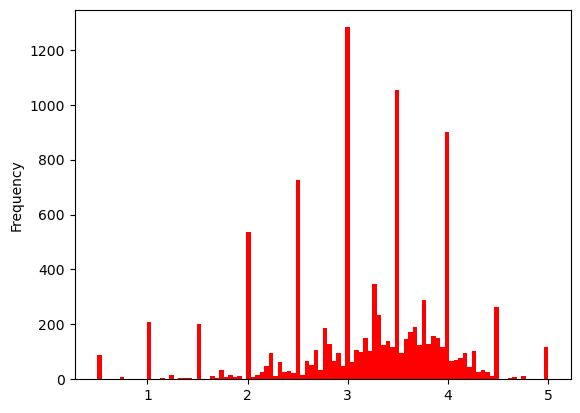

In [49]:
rating_mean_count_df['mean'].plot(bins=100 ,kind='hist',color='r')

<Axes: ylabel='Frequency'>

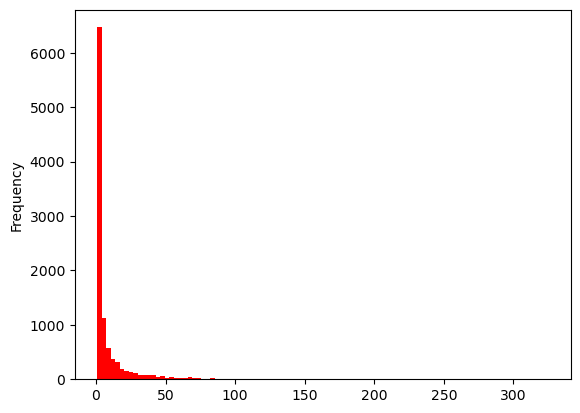

In [51]:
rating_mean_count_df['count'].plot(bins=100 ,kind='hist',color='r')


In [52]:
rating_mean_count_df[rating_mean_count_df['mean']==5]

,count,mean
title,,
21 Up (1977),1.0,5.0
50 Children: The Rescue Mission of Mr. And Mrs. Kraus (2013),1.0,5.0
Air (2015),1.0,5.0
Andrei Rublev (Andrey Rublyov) (1969),1.0,5.0
Animal Farm (1954),1.0,5.0
...,...,...
War Photographer (2001),1.0,5.0
Werckmeister Harmonies (Werckmeister harmóniák) (2000),1.0,5.0
Wings (1927),2.0,5.0


In [54]:
rating_mean_count_df.sort_values('count',ascending=False).head(100)

,count,mean
title,,
Pulp Fiction (1994),325.0,4.160000
Forrest Gump (1994),311.0,4.138264
"Shawshank Redemption, The (1994)",308.0,4.454545
Jurassic Park (1993),294.0,3.659864
"Silence of the Lambs, The (1991)",290.0,4.194828
...,...,...
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",119.0,4.075630
Taxi Driver (1976),118.0,4.029661
"Breakfast Club, The (1985)",118.0,3.758475


In [55]:
rating_mean_count_df.sort_values('count',ascending=True).head(100)


,count,mean
title,,
'71 (2014),1.0,3.5
Leatherface: Texas Chainsaw Massacre III (1990),1.0,0.5
Leap Year (Año bisiesto) (2010),1.0,2.0
"League of Ordinary Gentlemen, A (2004)",1.0,3.5
Le Grand Restaurant (1966),1.0,2.5
...,...,...
"Long Way Down, A (2014)",1.0,2.5
"Long Gray Line, The (1955)",1.0,5.0
Lonesome Jim (2005),1.0,2.5
